# Financial Fraud Detection With Imbalanced Data

# 📌 Introduction  
This assignment on **Financial Fraud Detection with Imbalanced Data** focuses on applying multiple machine learning techniques to classify financial transactions as fraudulent or legitimate. The project workflow includes:  
- **Dataset Analysis:** Exploring the synthetic fraud dataset (50,000 records) that contains numerical, categorical, and temporal features with the binary target `Fraud_Label`. Columns such as `Transaction_ID`, `Transaction_Amount`, `Timestamp`, `Account_Balance`, `Device_Type`, and encoded categorical fields provide transaction-level, user-level, and device-level context for fraud detection. **Dataset:https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset**
- **Data Preprocessing:** One-hot encoding for categorical variables, feature scaling for numerical variables, and preparation of a processed dataset (`processed_df`) for modeling. Stratified splits were applied to maintain class balance in training and testing sets.  
- **Model Development and Comparison:** Training and evaluating a variety of classical ML classifiers:  
  - **Logistic Regression:** Serves as a strong, interpretable baseline.  
  - **Decision Tree Classifier:** Provides non-linear decision boundaries and interpretable rules.  
  - **Random Forest Classifier:** An ensemble of decision trees for better generalization and reduced variance.  
  - **XGBoost Classifier:** A gradient boosting method optimized for high performance and handling imbalance.  
- **Performance Evaluation:** Each model was assessed using accuracy, precision, recall, F1-score, and ROC-AUC. Confusion matrix heatmaps and ROC curves were plotted to visualize trade-offs between false positives and false negatives.  
- **Imbalanced Data Considerations:** Since fraudulent cases are the minority class, the evaluation emphasized metrics beyond accuracy (e.g., recall, ROC-AUC) to ensure fraud detection effectiveness.  

The goal is to demonstrate how different classical and ensemble models perform on fraud detection tasks, highlighting both interpretability and predictive power in the context of imbalanced data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("synthetic_fraud_dataset.csv")
# reading csv file

In [3]:
df.head()
# to print first five rows

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


## Data Preprocessing

In [4]:
df.columns
# lists column names

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [5]:
df.info()
# give column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [6]:
df.shape
# to get the dimensions of the data

(50000, 21)

In [7]:
df.describe()
# statistical summary for numeric columns

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [8]:
df.describe(include='O')
# for categorical columns

,Transaction_ID,User_ID,Transaction_Type,Timestamp,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,8963,4,47724,3,5,5,4,4
top,TXN_33553,USER_6599,POS,2023-06-04 06:35:00,Tablet,Tokyo,Clothing,Mastercard,Biometric
freq,1,16,12549,4,16779,10208,10033,12693,12591


In [9]:
df.isnull().sum()
# to check for null values

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [10]:
df = df.drop(columns=['Transaction_ID', 'User_ID', 'Timestamp'])
# dropping unnecessary columns

In [11]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [12]:
df.shape

(50000, 18)

In [13]:
df.Fraud_Label.unique()
# to get the unique labels in the target column

array([0, 1], dtype=int64)

In [14]:
df.Fraud_Label.value_counts()
# counting occurrences of each unique value in target column

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

In [15]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()
# creating an automated report of the dataset

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Feature Encoding

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# creating list of numerical and categorical columns

print('Categorical Columns:\n', categorical_columns)
print('Numerical Columns:\n', numerical_columns)

Categorical Columns:
 ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
Numerical Columns:
 ['Transaction_Amount', 'Account_Balance', 'IP_Address_Flag', 'Previous_Fraudulent_Activity', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Age', 'Transaction_Distance', 'Risk_Score', 'Is_Weekend', 'Fraud_Label']


In [17]:
from sklearn.preprocessing import OneHotEncoder
# to convert categorical variables

In [18]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
# drops one category per feature to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_columns])

In [19]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# assigning column names using get_feature_names_out() so the new columns are named like Transaction_Type_POS
print('Encoded Categorical Data:')
print(encoded_df.head())

Encoded Categorical Data:
   Transaction_Type_Bank Transfer  Transaction_Type_Online  \
0                             0.0                      0.0   
1                             1.0                      0.0   
2                             0.0                      1.0   
3                             0.0                      0.0   
4                             0.0                      0.0   

   Transaction_Type_POS  Device_Type_Mobile  Device_Type_Tablet  \
0                   1.0                 0.0                 0.0   
1                   0.0                 1.0                 0.0   
2                   0.0                 0.0                 1.0   
3                   0.0                 0.0                 1.0   
4                   1.0                 1.0                 0.0   

   Location_Mumbai  Location_New York  Location_Sydney  Location_Tokyo  \
0              0.0                0.0              1.0             0.0   
1              0.0                1.0             

In [20]:
numerical_columns.remove('Fraud_Label')
numerical_columns
# droppping the target column before scaling the numerical columns

['Transaction_Amount',
 'Account_Balance',
 'IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Failed_Transaction_Count_7d',
 'Card_Age',
 'Transaction_Distance',
 'Risk_Score',
 'Is_Weekend']

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
# to standardize numerical features

In [22]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df[numerical_columns])

In [23]:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
print(scaled_df.head())

   Transaction_Amount  Account_Balance  IP_Address_Flag  \
0           -0.604147         1.492310        -0.229898   
1           -0.995285         0.884250        -0.229898   
2           -0.713888        -1.693492        -0.229898   
3            1.569711         0.921870        -0.229898   
4           -0.690380         1.462460        -0.229898   

   Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0                     -0.330362                -0.120121   
1                     -0.330362                 1.365176   
2                     -0.330362                 1.612725   
3                     -0.330362                 0.127429   
4                      3.026979                 1.612725   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
0                   1.289836                     0.704581 -0.797272   
1                   1.580752                     1.411665  0.956729   
2                  -1.451837                     1.411665  1.536564   


In [24]:
processed_df = pd.concat([scaled_df, encoded_df], axis=1)
processed_df['Fraud_Label'] = df['Fraud_Label'].values
# concatenating the scaled numeric DataFrame and the encoded categorical DataFrame

In [25]:
processed_df.head()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,...,Merchant_Category_Groceries,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password,Fraud_Label
0,-0.604147,1.492310,-0.229898,-0.330362,-0.120121,1.289836,0.704581,-0.797272,-1.120662,1.208753,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.995285,0.884250,-0.229898,-0.330362,1.365176,1.580752,1.411665,0.956729,-0.205135,-1.409646,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,-0.713888,-1.693492,-0.229898,-0.330362,1.612725,-1.451837,1.411665,1.536564,-0.409067,1.176089,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.569711,0.921870,-0.229898,-0.330362,0.127429,-0.514864,1.411665,-0.637818,-0.823374,1.014502,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,-0.690380,1.462460,-0.229898,3.026979,1.612725,0.519293,1.411665,0.289918,-1.062541,-0.415801,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [26]:
import seaborn as sns

<Axes: >

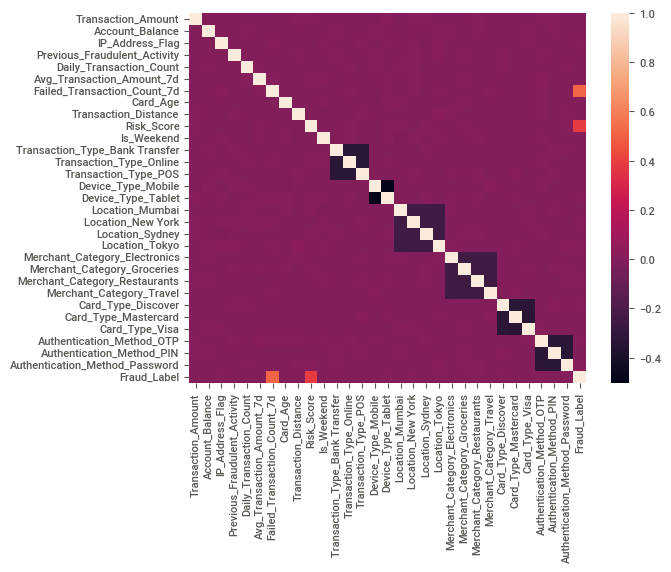

In [27]:
sns.heatmap(processed_df.corr(),annot=False)
# correlation matrix of processed_df and using seaborn to plot a heatmap

## Model Building & Evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
x=processed_df.drop('Fraud_Label',axis=1)
y=processed_df['Fraud_Label']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
# train test split with 70-30 also, random_state=42 ensures reproducible splits and class proportion of fraud/legit in train and test with statify

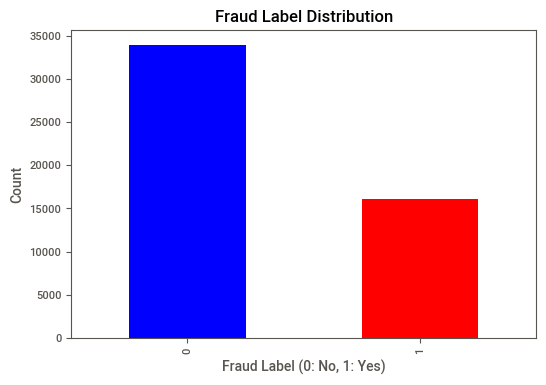

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Fraud Label Distribution')
plt.xlabel('Fraud Label (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()
# plotting the bar graph to show the data imbalance

In [32]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred
# training logistic regression model and predicting

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score,f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test,LR_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test,LR_pred))
print("\nPrecision Score:\n", precision_score(y_test,LR_pred))
print("\nRecall Score:\n", recall_score(y_test,LR_pred))
print("\nF1 Score:\n", f1_score(y_test,LR_pred))
print("\nClassification Report:\n", classification_report(y_test,LR_pred))
# printing all the metrics for LR

Confusion Matrix:
 [[8957 1223]
 [1702 3118]]

Accuracy Score:
 0.805

Precision Score:
 0.718267680258005

Recall Score:
 0.6468879668049793

F1 Score:
 0.6807117126951207

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     10180
           1       0.72      0.65      0.68      4820

    accuracy                           0.81     15000
   macro avg       0.78      0.76      0.77     15000
weighted avg       0.80      0.81      0.80     15000



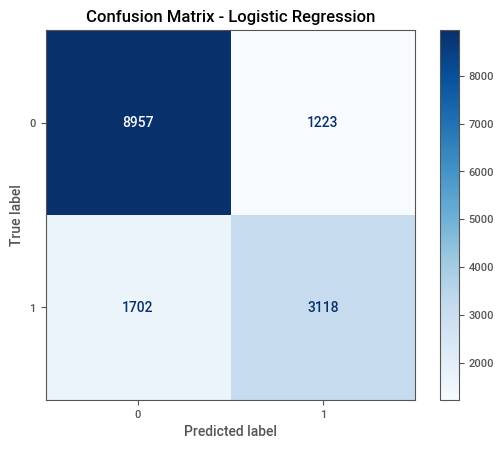

In [34]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LR, x_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
# creating a plot to differentiate between actual and predicted for Logistic Regression

In [35]:
LR_prob = LR.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, LR_prob)
roc_auc = auc(fpr, tpr)
# generating the values to plot the ROC-curve

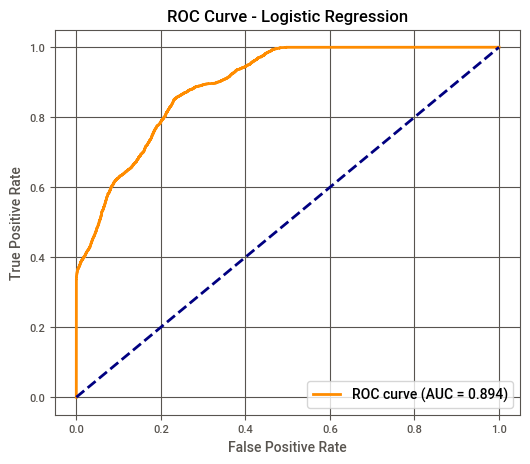

In [36]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# plotting the ROC curve for Logistic Regression

In [37]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred
# training and predicting on Decision Tree model

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [38]:
print("Confusion Matrix:\n", confusion_matrix(y_test,DT_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test,DT_pred))
print("\nPrecision Score:\n", precision_score(y_test,DT_pred))
print("\nRecall Score:\n", recall_score(y_test,DT_pred))
print("\nF1 Score:\n", f1_score(y_test,DT_pred))
print("\nClassification Report:\n", classification_report(y_test,DT_pred))
# decision tree metrices

Confusion Matrix:
 [[10180     0]
 [    0  4820]]

Accuracy Score:
 1.0

Precision Score:
 1.0

Recall Score:
 1.0

F1 Score:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10180
           1       1.00      1.00      1.00      4820

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



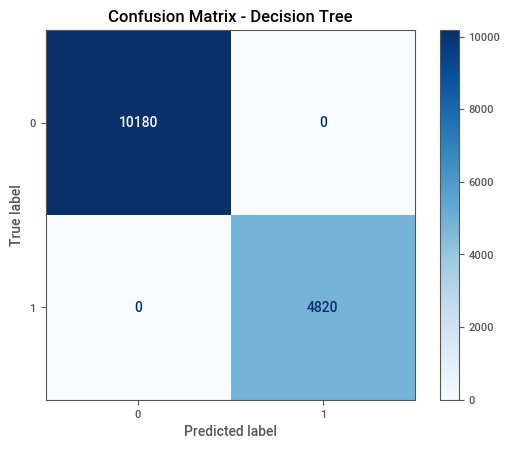

In [39]:
ConfusionMatrixDisplay.from_estimator(DT, x_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
# creating a plot to differentiate between actual and predicted for Decision Tree

In [40]:
DT_prob = DT.predict_proba(x_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, DT_prob)
roc_auc1 = auc(fpr1, tpr1)

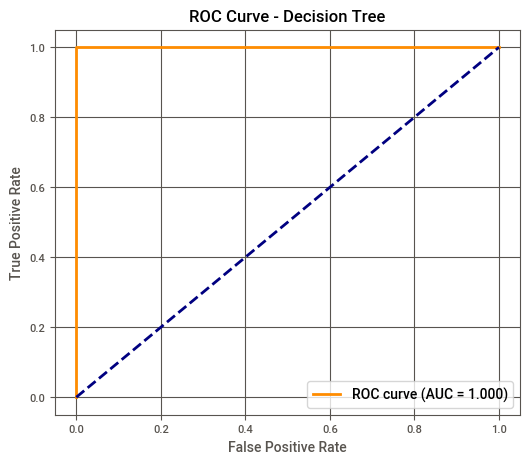

In [41]:
plt.figure(figsize=(6,5))
plt.plot(fpr1, tpr1, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc1:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# plotting the ROC curve for Decision Tree

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred=rfc.predict(x_test)
rfc_pred
# training and predicting on Random forest model

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test,rfc_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test,rfc_pred))
print("\nPrecision Score:\n", precision_score(y_test,rfc_pred))
print("\nRecall Score:\n", recall_score(y_test,rfc_pred))
print("\nF1 Score:\n", f1_score(y_test,rfc_pred))
print("\nClassification Report:\n", classification_report(y_test,rfc_pred))
# random forest metrices

Confusion Matrix:
 [[10180     0]
 [    0  4820]]

Accuracy Score:
 1.0

Precision Score:
 1.0

Recall Score:
 1.0

F1 Score:
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10180
           1       1.00      1.00      1.00      4820

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



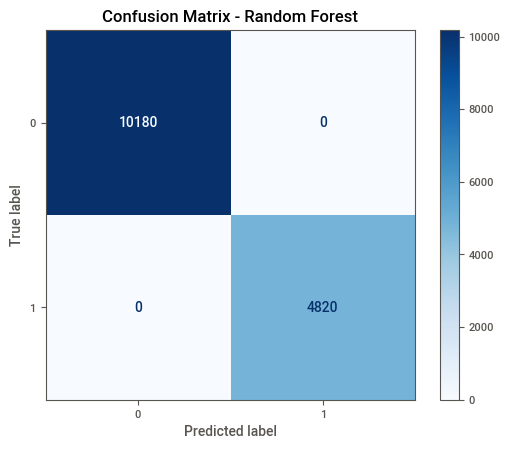

In [45]:
ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()
# creating a plot to differentiate between actual and predicted for Random Forest

In [46]:
rfc_prob = rfc.predict_proba(x_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test, rfc_prob)
roc_auc2 = auc(fpr2, tpr2)

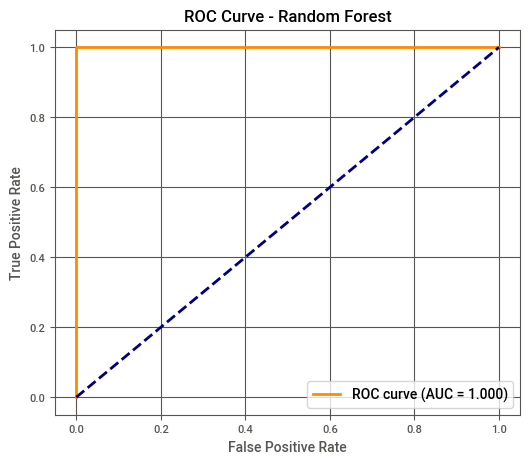

In [47]:
plt.figure(figsize=(6,5))
plt.plot(fpr2, tpr2, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc2:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# plotting the ROC curve for Random Forest

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred=xgb.predict(x_test)
xgb_pred
# training the XGBoost model and predicting

array([0, 0, 0, ..., 0, 0, 1])

In [50]:
print("Confusion Matrix:\n", confusion_matrix(y_test,xgb_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test,xgb_pred))
print("\nPrecision Score:\n", precision_score(y_test,xgb_pred))
print("\nRecall Score:\n", recall_score(y_test,xgb_pred))
print("\nF1 Score:\n", f1_score(y_test,xgb_pred))
print("\nClassification Report:\n", classification_report(y_test,xgb_pred))
# XGboost model metrices

Confusion Matrix:
 [[10174     6]
 [    8  4812]]

Accuracy Score:
 0.9990666666666667

Precision Score:
 0.9987546699875467

Recall Score:
 0.9983402489626556

F1 Score:
 0.9985474164764474

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10180
           1       1.00      1.00      1.00      4820

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



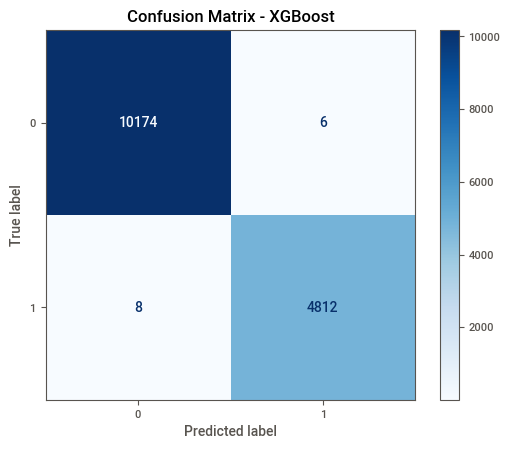

In [51]:
ConfusionMatrixDisplay.from_estimator(xgb, x_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost")
plt.show()
# creating a plot to differentiate between actual and predicted for XGBoost

In [52]:
xgb_prob = xgb.predict_proba(x_test)[:, 1]

fpr3, tpr3, _ = roc_curve(y_test, xgb_prob)
roc_auc3 = auc(fpr3, tpr3)

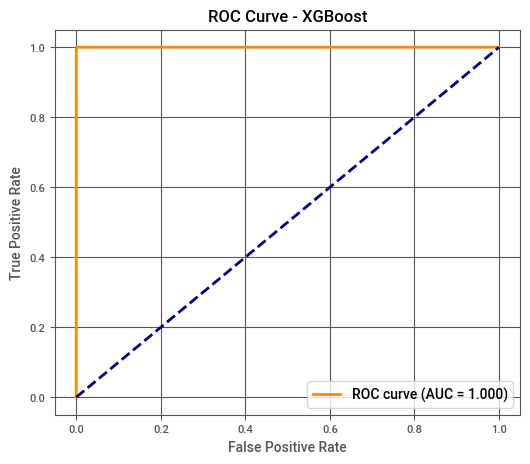

In [53]:
plt.figure(figsize=(6,5))
plt.plot(fpr3, tpr3, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc3:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# plotting the ROC curve for XGBoost

In [54]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1.25],
}
# defining the parameters

xgb_model = XGBClassifier()

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [56]:
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=strat_kfold,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
# using grid search crosss-validation to search for the best parameters to hypertune the XGBoost model

grid_search.best_params_

Fitting 3 folds for each of 128 candidates, totalling 384 fits


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'scale_pos_weight': 1.25,
 'subsample': 1.0}

In [57]:
xg = XGBClassifier(colsample_bytree= 0.8, gamma= 0.1, learning_rate= 0.1, max_depth= 3, min_child_weight= 3, n_estimators= 100, scale_pos_weight= 1.25, subsample= 1.0)
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)
xg_pred
# hypertuning the model, training and predicting on the hypertuned model

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test,xg_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test,xg_pred))
print("\nPrecision Score:\n", precision_score(y_test,xg_pred))
print("\nRecall Score:\n", recall_score(y_test,xg_pred))
print("\nF1 Score:\n", f1_score(y_test,xg_pred))
print("\nClassification Report:\n", classification_report(y_test,xg_pred))
# hypertuned XGBoost model metrices

Confusion Matrix:
 [[10173     7]
 [    0  4820]]

Accuracy Score:
 0.9995333333333334

Precision Score:
 0.9985498239071887

Recall Score:
 1.0

F1 Score:
 0.9992743858194257

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10180
           1       1.00      1.00      1.00      4820

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



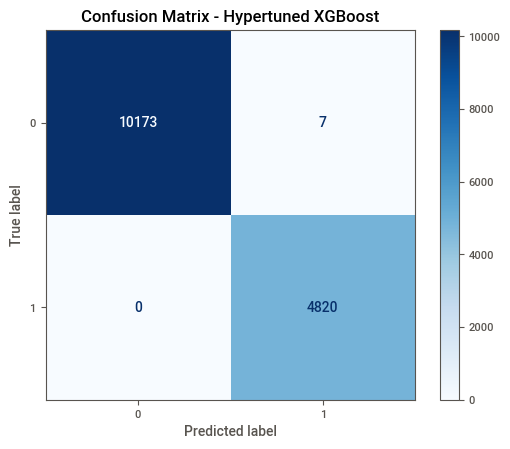

In [59]:
ConfusionMatrixDisplay.from_estimator(xg, x_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Hypertuned XGBoost")
plt.show()
# creating a plot to differentiate between actual and predicted for Hypertuned XGBoost

In [60]:
xg_prob = xg.predict_proba(x_test)[:, 1]

fpr4, tpr4, _ = roc_curve(y_test, xg_prob)
roc_auc4 = auc(fpr4, tpr4)

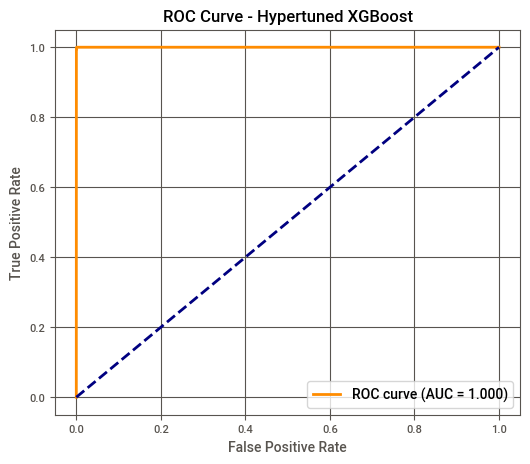

In [61]:
plt.figure(figsize=(6,5))
plt.plot(fpr4, tpr4, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc3:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Hypertuned XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# plotting the ROC curve for Hypertuned XGBoost

# 📌 Conclusion  
The assignment successfully implemented and compared multiple **machine learning classifiers** for fraud detection on an imbalanced synthetic dataset.  

**Key Findings:**  
- **Logistic Regression** offered an interpretable baseline with decent discrimination power, making it useful for understanding key predictors.  
- **Decision Tree** captured non-linear relationships but showed sensitivity to overfitting.  
- **Random Forest** improved robustness and overall performance by averaging across multiple trees, reducing variance.  
- **XGBoost** delivered the strongest performance in terms of ROC-AUC and recall, effectively handling imbalance through boosting and fine-grained optimization.  
- ROC curve analysis illustrated the separation ability of each model, while confusion matrices highlighted that fraud detection (minority class) remained more challenging compared to legitimate transactions.  
- Metrics beyond accuracy, particularly recall and precision, proved essential in assessing fraud detection performance.  

Overall, the project demonstrated how a combination of baseline models (Logistic Regression), interpretable tree-based methods (Decision Tree), ensemble approaches (Random Forest), and boosting techniques (XGBoost) can provide a comprehensive fraud detection pipeline. This layered approach balances interpretability with predictive strength and sets the foundation for deploying effective fraud detection systems in real-world financial settings.